<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS646/blob/main/Find_Planck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pylab as plt
from scipy.stats import linregress
from scipy import optimize
from google.colab import files
%pylab inline
#plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
di = .005
v435 = [-1.174, -1.171, -1.168, -1.165, -1.162, -1.159, -1.156]
i435 = [-.133, -.075, .001, .065, .129, .199, .273]
i435err = [di for x in range(len(i435))]

In [ ]:
v254 = [-1.120, -1.450, -1, -.8, -.5]
i254 = [.001, -.005, .007, .016, .038]
i254err = [.003, .004, .003, .003, .005]

In [ ]:
v405 = [-1.383, -1.387, -1.380, -1.377, -1.374]
i405 = [-.02, -.19, .13, .28, .40]
i405err = [.02, .02, .02, .01, .02]

In [ ]:
v577 = [-.683, -.686, -.680, -.677, -.674]
i577 = [.001, -.125, .145, .262, .392]
i577err = [.005, .010, .010, .005, .005]

In [ ]:
v365 = [-1.620, -1.623, -1.617, -1.614, -1.611]
i365 = [.005, -.205, .24, .47, .775]
i365err = [.015, .01, .03, .02, .015]

In [ ]:
v546 = [-.773, -.776, -.770, -.767, -.764]
i546 = [.03, -.18, .23, .449, .675]
i546err = [.02, .02, .01, .005, .005]

In [ ]:
x = v254
y = i254
yerr = i254err

In [ ]:
A = np.vander(x, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA = np.dot(A.T, A / np.power(yerr,2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors
w = np.linalg.solve(ATA, np.dot(A.T, y / np.power(yerr,2)))

In [ ]:
-w[1]/w[0], np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]), -w[1]/w[0]*( (cov[0, 0]/w[0]**2)+(cov[1, 1]/w[1]**2) )**(1/2)

(-1.2046386576190713,
 0.005902879633060681,
 0.006084111056328384,
 -0.2172887072966723)

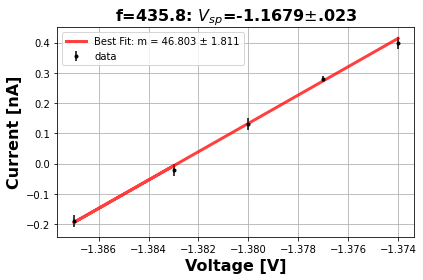

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(x,y,yerr=yerr, fmt=".k", label="data")
ax.plot(x, np.multiply(w[0],x)+w[1], "r", 
         alpha=0.75, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
ax.set_title(r'f=435.8: $V_{sp}$=-1.1679$\pm$.023', fontsize=16, fontweight='bold')
ax.set_xlabel('Voltage [V]', fontsize=16, fontweight='bold')
ax.set_ylabel(r'Current [nA]', fontsize=16, fontweight='bold')
#ax.set_xlim(.9,2.9)
#ax.set_ylim(3,10)
ax.legend()
ax.grid()
plt.tight_layout()

In [ ]:
wave = [435.8, 254.7, 404.7, 577.0, 365.0, 546.1]
vsp = [-1.1679, -1.2046, -1.3828, -.6831, -1.6203, -.7732]
vsperr = [.0230, .2173, .0756, .0147, .0397, .0178]

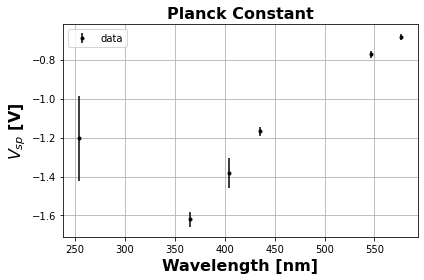

In [ ]:
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.errorbar(wave,vsp,yerr=vsperr, fmt=".k", label="data")
#ax1.plot(x, np.multiply(w[0],x)+w[1], "r", 
#         alpha=0.75, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
ax1.set_title(r'Planck Constant', fontsize=16, fontweight='bold')
ax1.set_xlabel('Wavelength [nm]', fontsize=16, fontweight='bold')
ax1.set_ylabel(r'$V_{sp}$ [V]', fontsize=16, fontweight='bold')
#ax.set_xlim(.9,2.9)
#ax.set_ylim(3,10)
ax1.legend()
ax1.grid()
plt.tight_layout()